<a href="https://colab.research.google.com/github/Sebastian-Cely/M1-Procesamiento-datos-secuenciales/blob/main/Motion_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sebastian-Cely/M1-Procesamiento-datos-secuenciales.git

Cloning into 'M1-Procesamiento-datos-secuenciales'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 192 (delta 32), reused 8 (delta 4), pack-reused 122
Receiving objects: 100% (192/192), 3.50 MiB | 19.39 MiB/s, done.
Resolving deltas: 100% (42/42), done.


**Importar Librerías**

In [12]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score


**Importar datos del Objeto JSON**

In [5]:
import json

# Cargar datos desde el archivo JSON
with open('/content/M1-Procesamiento-datos-secuenciales/data/motion/arriba-jd3.json', 'r') as file:
    datos_json = json.load(file)

# Extraer los valores de los sensores
valores_sensores = datos_json['payload']['values']

print("Valores de los sensores:")
print(valores_sensores)


Valores de los sensores:
[[-0.10639240933842957, -9.012222208073736, -4.737677341681718], [0.6982089860778301, -8.781930520409345, -3.971981430982053], [0.000598641746584326, -8.526349493187665, -4.041862191937864], [-0.32635943113695826, -8.448088441899419, -4.628591236279904], [-0.15472517268974334, -8.809164564293622, -6.0303963083013885], [-0.236277812869288, -8.90029386498332, -4.734085746930539], [-0.326509050474409, -8.682870426720381, -4.477756531690061], [-0.6335656143188476, -8.241439495629072, -4.957345051740109], [-0.48288043773490935, -8.348879295128583, -5.092917013007402], [-0.24690208273623138, -8.19145995145142, -5.224298244586587], [-0.14799146225424484, -7.915828069847822, -4.810400632587075], [0.3359365106305748, -8.456169457024336, -3.5194776094734666], [0.4147956202851608, -8.4533263425529, -2.818425435858965], [1.0187328337959478, -8.56181360527873, -3.727622931781411], [0.6877346278092824, -7.860162881249189, -4.252402300427854], [-0.3263595407348126, -8.1583906

**Visualización de datos Iniciales**

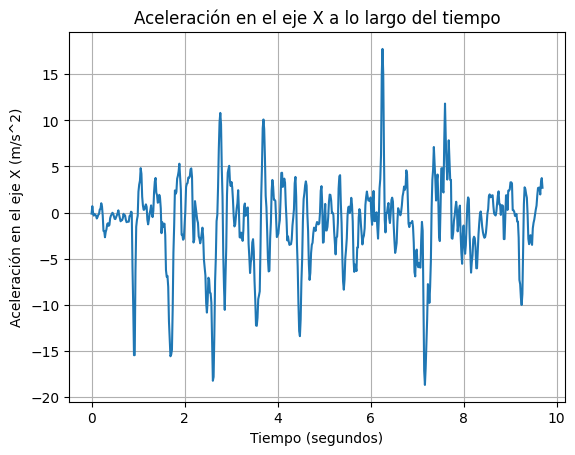

In [6]:
# Obtener los valores de la aceleración en el eje X
valores_x = [dato[0] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# Suponiendo que los datos se registraron a intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar los valores de la aceleración en el eje X con respecto al tiempo
plt.plot(tiempos, valores_x)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Aceleración en el eje X (m/s^2)')
plt.title('Aceleración en el eje X a lo largo del tiempo')
plt.grid(True)
plt.show()


**Análisis de patrones de movimiento**

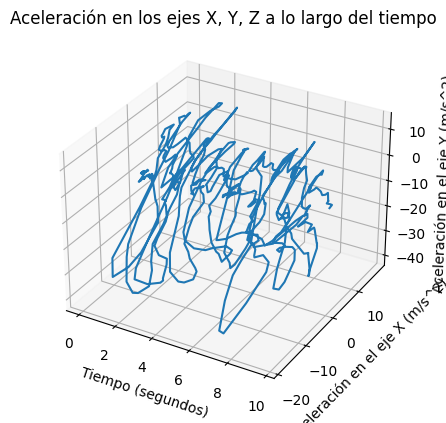

In [7]:

# Obtener los valores de aceleración en los ejes X, Y, Z
valores_x = [dato[0] for dato in valores_sensores]
valores_y = [dato[1] for dato in valores_sensores]
valores_z = [dato[2] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar la aceleración en los ejes X, Y, Z en una gráfica tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tiempos, valores_x, valores_y, label='Aceleración en los ejes X, Y, Z')
ax.set_xlabel('Tiempo (segundos)')
ax.set_ylabel('Aceleración en el eje X (m/s^2)')
ax.set_zlabel('Aceleración en el eje Y (m/s^2)')
plt.title('Aceleración en los ejes X, Y, Z a lo largo del tiempo')
plt.grid(True)
plt.show()

**Preprocesamiento de datos**

In [8]:
from sklearn.preprocessing import StandardScaler

# Supongamos que 'valores_sensores' contiene tus datos de sensores
# y que ya has extraído las características relevantes y las etiquetas de clase de tus datos

# Obtener las características (X) y las etiquetas de clase (y)
X = [[-0.10639240933842957, -9.012222208073736, -4.737677341681718],
     [0.6982089860778301, -8.781930520409345, -3.971981430982053],
     [0.000598641746584326, -8.526349493187665, -4.041862191937864],
     [-0.32635943113695826, -8.448088441899419, -4.628591236279904],
     [-0.15472517268974334, -8.809164564293622, -6.0303963083013885],
     [-0.236277812869288, -8.90029386498332, -4.734085746930539],
     [-0.326509050474409, -8.682870426720381, -4.477756531690061],
     [-0.6335656143188476, -8.241439495629072, -4.957345051740109]]

y = ['caminar', 'caminar', 'correr', 'estar_quieto', 'caminar', 'correr', 'estar_quieto', 'caminar']

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Normalizar los datos
X_normalizado = scaler.fit_transform(X)

**Eliminación de valores faltantes**

In [9]:
from sklearn.impute import SimpleImputer

# Supongamos que 'X' contiene tus datos con valores faltantes

# Inicializar el objeto SimpleImputer con la estrategia de imputación
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a tus datos
X_imputado = imputer.fit_transform(X)


**Módelo de Árbol de decisión**

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     caminar       0.50      1.00      0.67         1
      correr       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Entrenamiento del modelo**




In [11]:
# Entrenar el modelo utilizando el conjunto de entrenamiento
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular la precisión balanceada del modelo
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Precisión balanceada del modelo:", balanced_accuracy)


NameError: name 'decision_tree_model' is not defined

In [21]:
# Verificar los datos de entrada
print("Ejemplos de datos de entrada:")
print(X_train[:5])  # Imprimir las primeras 5 muestras de datos de entrenamiento
print("Etiquetas correspondientes:")
print(y_train[:5])  # Imprimir las primeras 5 etiquetas correspondientes


Ejemplos de datos de entrada:
[[-0.10639240933842957, -9.012222208073736, -4.737677341681718], [-0.6335656143188476, -8.241439495629072, -4.957345051740109], [0.000598641746584326, -8.526349493187665, -4.041862191937864], [-0.15472517268974334, -8.809164564293622, -6.0303963083013885], [-0.32635943113695826, -8.448088441899419, -4.628591236279904]]
Etiquetas correspondientes:
['caminar', 'caminar', 'correr', 'caminar', 'estar_quieto']


In [22]:
# Explorar el balance de clases
from collections import Counter

# Calcular la distribución de clases en el conjunto de entrenamiento
clases_train = Counter(y_train)
print("Distribución de clases en el conjunto de entrenamiento:")
print(clases_train)

# Calcular la distribución de clases en el conjunto de prueba
clases_test = Counter(y_test)
print("\nDistribución de clases en el conjunto de prueba:")
print(clases_test)


Distribución de clases en el conjunto de entrenamiento:
Counter({'caminar': 3, 'estar_quieto': 2, 'correr': 1})

Distribución de clases en el conjunto de prueba:
Counter({'caminar': 1, 'correr': 1})
